<div>
Olá, Taina!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos. 

<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

In [84]:
#Importando as bibliotecas necessárias:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import math 
from statsmodels.stats.proportion import proportions_ztest

In [44]:
#Lendo o arquivo de dados:
logs_df = pd.read_csv('/datasets/logs_exp_us.csv' , sep='\t')

In [45]:
#Obtendo informações sobre o arquivo:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [46]:
#Obtendo informações sobre o arquivo:
logs_df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `\t`
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- **Dica**: Evite implementar várias linhas de código/comandos na mesma célula do notebook. Procure, sempre que possível, isolar a execução do código.
</div>

In [47]:
#Renomeando as colunas (Passando todos os caracteres para minusculo):
logs_df.columns = logs_df.columns.str.lower()
logs_df.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [48]:
#Criando uma coluna de data e hora e outra apenas de datas:

# Converter o timestamp em segundos para o formato de data e hora
logs_df['eventtimestamp'] = pd.to_datetime(logs_df['eventtimestamp'], unit='s')

# Adicionar a coluna de data (somente a data, sem a hora)
logs_df['date'] = logs_df['eventtimestamp'].dt.date

# Verificar o DataFrame 
print(logs_df.head())

                 eventname         deviceidhash      eventtimestamp  expid  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248   

         date  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os nomes das colunas foram convertidos para seguir o padrão `snake_case`
- A hora foi extraída a partir do timestamp
- Aqui você poderia analisar os valores nulos do conjunto de dados
</div>

In [49]:
#Avaliando o total de valores nulos por coluna:
logs_df.isnull().sum()

eventname         0
deviceidhash      0
eventtimestamp    0
expid             0
date              0
dtype: int64

In [50]:
#Contando o numero de eventos no registro:
event_counts = logs_df['eventname'].value_counts()
print(event_counts)

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: eventname, dtype: int64


In [51]:
#Contando o numero de usuários únicos nos registros:
user_counts = logs_df['deviceidhash'].nunique()
print(user_counts)

7551


In [52]:
#Número médio de eventos por usuário:
average_events_per_user = user_counts/event_counts
print(average_events_per_user)

MainScreenAppear           0.063345
OffersScreenAppear         0.161260
CartScreenAppear           0.176710
PaymentScreenSuccessful    0.220062
Tutorial                   7.177757
Name: eventname, dtype: float64


In [53]:
# Encontrarndo a data mínima e máxima
min_date = logs_df['date'].min()
max_date = logs_df['date'].max()

print("Período de tempo coberto pelos dados:")
print(f"Data mínima: {min_date}")
print(f"Data mínima: {max_date}")

Período de tempo coberto pelos dados:
Data mínima: 2019-07-25
Data mínima: 2019-08-07


In [54]:
# Encontrarndo o intervalo entre a data mínima e máxima:
range_date = max_date - min_date

print("O intervalo de tempo coberto pelos dados:")
print(range_date)

O intervalo de tempo coberto pelos dados:
13 days, 0:00:00


Pergunta:
"Desenhe um histograma por data e hora. Você pode ter certeza de que possui os dados igualmente completos para todo o período? Os eventos mais antigos podem acabar aparecendo nos diários de alguns usuários por motivos técnicos, e isso pode distorcer o quadro geral. Encontre o momento em que os dados começam a ser completos e ignore a seção anterior. Qual período os dados realmente representam?"

Solução:
Criar um histograma de eventos por data para visualizar a distribuição dos eventos ao longo do tempo.
Identificar possíveis lacunas ou inconsistências nos dados, verificando se a coleta de eventos é desigual ao longo do tempo.
Determinar o momento em que os dados começam a ser completos, identificando o ponto onde a frequência de eventos se estabiliza.
Filtrar os dados a partir desse ponto e calcular novamente o período representado.

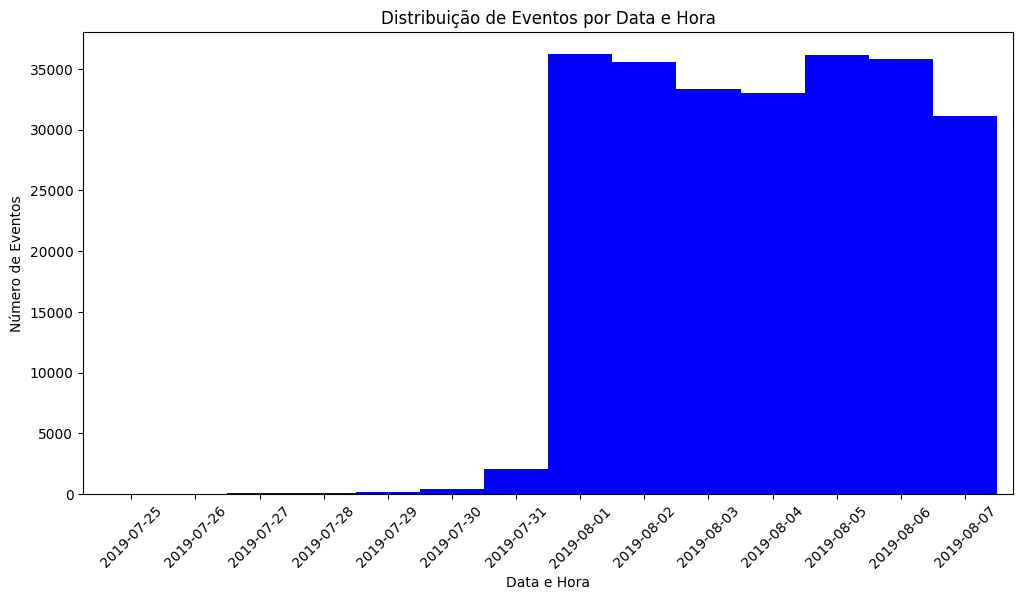

In [55]:
# Plotar um histograma de eventos por dia
plt.figure(figsize=(12, 6))
logs_df['date'].value_counts().sort_index().plot(kind='bar', width=1, color='blue')

plt.xlabel('Data e Hora')
plt.ylabel('Número de Eventos')
plt.title('Distribuição de Eventos por Data e Hora')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O total de eventos no período e média de eventos por usuário foram calculados
- O período de cobertura dos dados foi analisado. Como sugestão, aqui você poderia calcular também o intervalo entre as datas
- A distribuição dos eventos foi analisada ao longo dos dias
- A conclusão foi apresentada
</div>

Observa-se que a partir do dia 31 até o final do periodo, os eventos se estabilizam. 

O critério para determinar quando os dados se tornam completos foi baseado na estabilização do número de eventos por hora. Primeiro, calculeis a mediana de eventos por hora para identificar um valor típico. 
Em seguida, defini um limiar como 50% dessa mediana e considei como início dos dados completos o primeiro momento em que a frequência de eventos ultrapassa esse limiar de forma consistente.

In [56]:
# Armazena o total de eventos antes da filtragem
total_eventos_antes = len(logs_df)

# Criar uma coluna apenas com a data e hora arredondada para horas completas
logs_df['hour'] = logs_df['eventtimestamp'].dt.floor('H')

# Contar o número de eventos por hora
event_counts_by_hour = logs_df.groupby('hour').size()

# Identificar o momento em que os eventos se estabilizam
threshold = event_counts_by_hour.median() * 0.5  # Define um limite (exemplo: 50% da mediana)
stable_start = event_counts_by_hour[event_counts_by_hour > threshold].index.min()

# Filtrar os dados para ignorar períodos incompletos
filtered_logs_df = logs_df[logs_df['hour'] >= stable_start]

# Novo período representado pelos dados
min_date_filtered = filtered_logs_df['eventtimestamp'].min()
max_date_filtered = filtered_logs_df['eventtimestamp'].max()

print("Os dados completos começam em:", stable_start)
print(f"O período realmente representado é de {min_date_filtered} até {max_date_filtered}")

Os dados completos começam em: 2019-07-31 21:00:00
O período realmente representado é de 2019-07-31 21:00:57 até 2019-08-07 21:15:17


In [57]:
# Filtrar os dados para manter apenas eventos a partir do momento estável
logs_df = logs_df[logs_df['eventtimestamp'] >= stable_start]

# Resetar o índice após a filtragem (opcional, para manter a numeração organizada)
logs_df.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>- Qual o percentual de eventos que serão filtrados?</s>
</div>

In [58]:
#Calculando o percentual de eventos filtrados:
percentual_filtrado = (1 - len(filtered_logs_df) / total_eventos_antes) * 100
print(f"Percentual de eventos removidos: {percentual_filtrado:.2f}%")

Percentual de eventos removidos: 0.82%


In [59]:
#Verificando que há usúarios dos 3 grupos:

# Contar o número de usuários únicos por grupo experimental
users_per_group = logs_df.groupby('expid')['deviceidhash'].nunique()

# Exibir os resultados
print(users_per_group)

expid
246    2484
247    2517
248    2537
Name: deviceidhash, dtype: int64


In [60]:
#Contar e classificar os eventos por frequência:
event_frequencies = logs_df['eventname'].value_counts()
print(event_frequencies)

MainScreenAppear           117992
OffersScreenAppear          46548
CartScreenAppear            42406
PaymentScreenSuccessful     34146
Tutorial                     1044
Name: eventname, dtype: int64


In [61]:
#Encontre o número de usuários que executaram cada uma dessas ações. Ordene os eventos pelo número de usuários. 
#Calcule a proporção de usuários que executaram a ação pelo menos uma vez.

# Contar o número de usuários únicos por evento
users_per_event = logs_df.groupby('eventname')['deviceidhash'].nunique()

# Ordenar os eventos pelo número de usuários únicos
users_per_event = users_per_event.sort_values(ascending=False)

# Calcular a proporção de usuários que realizaram cada ação pelo menos uma vez
total_users = logs_df['deviceidhash'].nunique()
users_per_event_ratio = users_per_event / total_users

# Criar um DataFrame com os resultados
event_analysis = pd.DataFrame({
    'Users': users_per_event,
    'Proportion': users_per_event_ratio
})

print(event_analysis)


                         Users  Proportion
eventname                                 
MainScreenAppear          7423    0.984744
OffersScreenAppear        4597    0.609843
CartScreenAppear          3736    0.495622
PaymentScreenSuccessful   3540    0.469621
Tutorial                   843    0.111833


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O funil de usuários foi analisado corretamente. Como sugestão, aqui você poderia plotar um gráfico de funil com os dados acima.
</div>

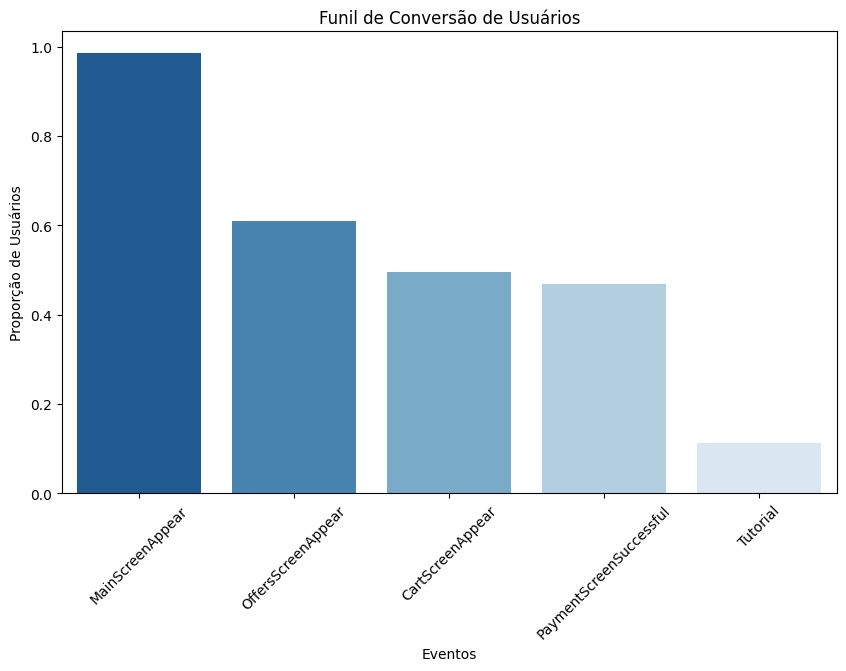

In [62]:
#Gráfico do funil de vendas:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=event_analysis.index, 
    y=event_analysis['Proportion'], 
    palette='Blues_r'
)

plt.xlabel("Eventos")
plt.ylabel("Proporção de Usuários")
plt.title("Funil de Conversão de Usuários")
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura

plt.show()

Pergunta:
Em que ordem você acha que as ações ocorreram? Todos elas fazem parte de uma única sequência? Você não precisa levá-las em consideração ao calcular o funil.


Resposta:

A partir dos eventos e suas frequências, podemos tentar inferir a ordem em que as ações ocorreram:

-MainScreenAppear (98.5%):Provavelmente o primeiro evento, pois quase todos os usuários o executaram. Isso sugere que ele representa a abertura do aplicativo ou a tela inicial.
-OffersScreenAppear (60.9%): Parece ocorrer depois, possivelmente quando os usuários exploram promoções ou produtos em destaque.
-CartScreenAppear (49.6%):Pode indicar que o usuário adicionou um item ao carrinho e acessou a tela de checkout.
-PaymentScreenSuccessful (46.9%):Provavelmente o evento final para usuários que concluíram a compra.
-Tutorial (11.2%):Esse evento pode ocorrer de forma independente, apenas para novos usuários ou para aqueles que acessaram uma seção de ajuda.
Nem todas ações parecem estar dentro de um fluxo linear obrigatório. O Tutorial, por exemplo, pode ser opcional. 
Já a sequência MainScreen → Offers → Cart → Payment faz sentido para um funil de compra, mas não necessariamente todos os usuários seguem esse caminho exatamente nessa ordem.
Conclusão:
Se o objetivo é calcular um funil de conversão, podemos focar apenas nos eventos que representam a jornada principal de compra (MainScreenAppear → CartScreenAppear → PaymentScreenSuccessful) e ignorar eventos que não fazem parte desse fluxo obrigatório, como o Tutorial. 


Pergunta:
Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima (por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B).Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima (por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B).Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima (por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B).Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima (por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B).

Resposta:
Considerando a seguinte sequencia provavel de compra para o funil: MainScreenAppear → CartScreenAppear →PaymentScreenSuccessful
Para cada transição, calcula-se a proporção de usuários que avançam para a próxima etapa.

In [63]:
# Definir a sequência do funil
funnel_events = ['MainScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Calcular a taxa de conversão entre etapas
conversion_rates = {}
for i in range(len(funnel_events) - 1):
    step_1 = funnel_events[i]
    step_2 = funnel_events[i + 1]
    
    # Evitar divisão por zero
    if users_per_event[step_1] > 0:
        conversion_rates[f"{step_1} → {step_2}"] = users_per_event[step_2] / users_per_event[step_1]
    else:
        conversion_rates[f"{step_1} → {step_2}"] = 0


for transition, rate in conversion_rates.items():
    print(f"{transition}: {rate:.2%}")

MainScreenAppear → CartScreenAppear: 50.33%
CartScreenAppear → PaymentScreenSuccessful: 94.75%


Pergunta:
Em qual fase você perde mais usuários?

Resposta:
A maior perda de usuários ocorre na transição de MainScreenAppear para CartScreenAppear, com uma conversão de 50,33%. Isso pode indicar que muitos usuários estão saindo ou não estão interessados em adicionar produtos ao carrinho após visualizar a tela inicial. Esse é o ponto crítico onde a otimização deve ser mais eficaz.

In [64]:
#Qual é a parcela de usuários que faz o caminho inteiro, desde o primeiro evento até o pagamento?

# Função para contar usuários que passaram por uma sequência específica de eventos
def count_users_in_sequence(events):
    users_in_sequence = logs_df[logs_df['eventname'] == events[0]]['deviceidhash'].unique()
    
    for event in events[1:]:
        # Encontrar usuários que realizaram o próximo evento na sequência
        users_in_sequence = set(users_in_sequence).intersection(
            set(logs_df[logs_df['eventname'] == event]['deviceidhash'].unique())
        )
    
    return len(users_in_sequence)

# Contar o número de usuários que passaram por todas as etapas do funil
users_full_funnel = count_users_in_sequence(['MainScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'])

# Contar o total de usuários que iniciaram o funil
total_users = logs_df[logs_df['eventname'] == 'MainScreenAppear']['deviceidhash'].nunique()

# Calcular a proporção de usuários que completaram o funil
full_funnel_completion_rate = users_full_funnel / total_users if total_users > 0 else 0

# Exibir o resultado
print(f"Parcela de usuários que completam todo o funil: {full_funnel_completion_rate:.2%}")



Parcela de usuários que completam todo o funil: 46.30%


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A etapa do funil em que há maior perda de usuários foi calculada
- O percentual de usuários que fizeram todas as etapas do funil foi analisado.
</div>

Passo 5: Experimento A/A/B

Perguntas:
Quantos usuários há em cada grupo?
Temos dois grupos de controle no teste A/A, no qual verificamos nossos mecanismos e cálculos. Veja se há uma diferença estatisticamente significativa entre as amostragens 246 e 247.

Respostas:
Contar o número de usuários em cada grupo experimental (ExpId).
Comparar estatisticamente os dois grupos de controle (ExpId 246 e 247) para verificar se há diferenças significativas.
Precisamos verificar se há uma diferença estatisticamente significativa entre os grupos de controle (expid 246 e 247). 
Como os usuários têm diferentes probabilidades de converter, podemos usar um teste qui-quadrado para comparar as taxas de conversão entre os dois grupos.

In [65]:
print(users_per_group)


expid
246    2484
247    2517
248    2537
Name: deviceidhash, dtype: int64


In [66]:
# Criar uma tabela de contingência para conversões nos grupos de controle
conversion_counts = logs_df[logs_df['eventname'] == 'PaymentScreenSuccessful'].groupby('expid')['deviceidhash'].nunique()

# Obter o número total de usuários por grupo
total_users = logs_df.groupby('expid')['deviceidhash'].nunique()

# Criar tabela de conversão (sucesso vs. não sucesso)
contingency_table = [
    [conversion_counts.get(246, 0), total_users[246] - conversion_counts.get(246, 0)],
    [conversion_counts.get(247, 0), total_users[247] - conversion_counts.get(247, 0)]
]

# Aplicar teste qui-quadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Exibir resultados
print(f"Teste qui-quadrado entre grupos 246 e 247:")
print(f"Estatística do teste: {chi2:.4f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretar resultado
alpha = 0.05  # Nível de significância padrão
if p_value < alpha:
    print("Há uma diferença estatisticamente significativa entre os grupos de controle.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos de controle.")


Teste qui-quadrado entre grupos 246 e 247:
Estatística do teste: 2.5671
Valor-p: 0.1091
Não há diferença estatisticamente significativa entre os grupos de controle.


OBS: Esse teste garante que a metodologia do experimento está correta antes de analisarmos os resultados do grupo de teste (expid 248)

Pergunta:
Selecione o evento mais popular. Em cada um dos grupos de controle, encontre o número de usuários que realizaram essa ação. Encontre a proporção deles. Verifique se a diferença entre os grupos é estatisticamente significativa. Repita o procedimento para todos os outros eventos (economizará tempo se você criar uma função especial para este teste). Você pode confirmar se os grupos foram divididos corretamente?
    
Resposta:
Para responder as perguntas acimas, seguiremos os seguintes passos:
-Identificar o evento mais popular (o evento com o maior número de usuários únicos).
-Para cada grupo de controle (ExpId 246 e 247), calcular:
O número de usuários que realizaram esse evento.
A proporção de usuários que realizaram esse evento em relação ao total do grupo.
-Verificar a significância estatística da diferença entre os grupos usando um teste qui-quadrado.
-Automatizar o processo para todos os eventos criando uma função.
-Confirmar se os grupos foram divididos corretamente ao verificar se as diferenças são estatisticamente insignificantes.

In [67]:
#Encontrar o evento mais polular:
most_popular_event = users_per_event.idxmax()
print(f"Evento mais popular: {most_popular_event}")

Evento mais popular: MainScreenAppear


In [68]:
#Criar função para testar diferenças estatísticas:definir uma função genérica para comparar os grupos de controle para qualquer evento.

def test_event_difference(event_name):
    # Contar usuários que realizaram o evento em cada grupo de controle
    event_counts = logs_df[logs_df['eventname'] == event_name].groupby('expid')['deviceidhash'].nunique()
    
    # Obter número total de usuários em cada grupo
    total_users = logs_df.groupby('expid')['deviceidhash'].nunique()
    
    # Criar tabela de contingência (usuários que fizeram vs. não fizeram o evento)
    contingency_table = [
        [event_counts.get(246, 0), total_users[246] - event_counts.get(246, 0)],
        [event_counts.get(247, 0), total_users[247] - event_counts.get(247, 0)]
    ]
    
    # Aplicar teste qui-quadrado
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calcular proporções
    prop_246 = event_counts.get(246, 0) / total_users[246]
    prop_247 = event_counts.get(247, 0) / total_users[247]
    
    # Exibir resultados
    print(f"Evento: {event_name}")
    print(f"Grupo 246 - Usuários: {event_counts.get(246, 0)}, Proporção: {prop_246:.2%}")
    print(f"Grupo 247 - Usuários: {event_counts.get(247, 0)}, Proporção: {prop_247:.2%}")
    print(f"Teste qui-quadrado: {chi2:.4f}, Valor-p: {p_value:.4f}")

    # Interpretação do resultado
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print("Diferença estatisticamente significativa entre os grupos!")
    else:
        print("Não há diferença estatisticamente significativa entre os grupos.")
    print("-" * 50)

# Testar o evento mais popular
test_event_difference(most_popular_event)


Evento: MainScreenAppear
Grupo 246 - Usuários: 2450, Proporção: 98.63%
Grupo 247 - Usuários: 2479, Proporção: 98.49%
Teste qui-quadrado: 0.0898, Valor-p: 0.7644
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------


In [69]:
# Testar todos os eventos disponíveis
event_popularity = logs_df.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False)
for event in event_popularity.index:
    test_event_difference(event)

Evento: MainScreenAppear
Grupo 246 - Usuários: 2450, Proporção: 98.63%
Grupo 247 - Usuários: 2479, Proporção: 98.49%
Teste qui-quadrado: 0.0898, Valor-p: 0.7644
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Evento: OffersScreenAppear
Grupo 246 - Usuários: 1542, Proporção: 62.08%
Grupo 247 - Usuários: 1524, Proporção: 60.55%
Teste qui-quadrado: 1.1685, Valor-p: 0.2797
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Evento: CartScreenAppear
Grupo 246 - Usuários: 1266, Proporção: 50.97%
Grupo 247 - Usuários: 1239, Proporção: 49.23%
Teste qui-quadrado: 1.4468, Valor-p: 0.2290
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Evento: PaymentScreenSuccessful
Grupo 246 - Usuários: 1200, Proporção: 48.31%
Grupo 247 - Usuários: 1158, Proporção: 46.01%
Teste qui-quadrado: 2.5671, Valor-p: 0.1091

Como não houve diferença estatisticamente segnificativa entre os grupos, isso confirma que os grupos foram divididos corretamente.

Pergunta:
Faça a mesma coisa para o grupo com fontes alteradas. Compare os resultados com os de cada um dos grupos de controle para cada evento isoladamente. Compare os resultados com os resultados combinados para os grupos de controle. Quais conclusões você pode tirar do experimento?

Resposta:
Podemos modificar a função anterior para aceitar dois grupos diferentes e rodar a comparação estatística.

In [70]:
def compare_groups(event_name, group_a, group_b):
    # Contar usuários que realizaram o evento em cada grupo
    event_counts = logs_df[logs_df['eventname'] == event_name].groupby('expid')['deviceidhash'].nunique()
    
    # Obter número total de usuários em cada grupo
    total_users = logs_df.groupby('expid')['deviceidhash'].nunique()
    
    # Criar tabela de contingência (usuários que fizeram vs. não fizeram o evento)
    contingency_table = [
        [event_counts.get(group_a, 0), total_users[group_a] - event_counts.get(group_a, 0)],
        [event_counts.get(group_b, 0), total_users[group_b] - event_counts.get(group_b, 0)]
    ]
    
    # Aplicar teste qui-quadrado
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calcular proporções
    prop_a = event_counts.get(group_a, 0) / total_users[group_a]
    prop_b = event_counts.get(group_b, 0) / total_users[group_b]
    
    # Exibir resultados
    print(f"Comparação entre grupos {group_a} e {group_b} para o evento: {event_name}")
    print(f"Grupo {group_a} - Usuários: {event_counts.get(group_a, 0)}, Proporção: {prop_a:.2%}")
    print(f"Grupo {group_b} - Usuários: {event_counts.get(group_b, 0)}, Proporção: {prop_b:.2%}")
    print(f"Teste qui-quadrado: {chi2:.4f}, Valor-p: {p_value:.4f}")

    # Interpretação do resultado
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print("Diferença estatisticamente significativa entre os grupos!")
    else:
        print("Não há diferença estatisticamente significativa entre os grupos.")
    print("-" * 50)
    
for event in event_popularity.index:
    compare_groups(event, 248, 246)
    compare_groups(event, 248, 247)

Comparação entre grupos 248 e 246 para o evento: MainScreenAppear
Grupo 248 - Usuários: 2494, Proporção: 98.31%
Grupo 246 - Usuários: 2450, Proporção: 98.63%
Teste qui-quadrado: 0.6814, Valor-p: 0.4091
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Comparação entre grupos 248 e 247 para o evento: MainScreenAppear
Grupo 248 - Usuários: 2494, Proporção: 98.31%
Grupo 247 - Usuários: 2479, Proporção: 98.49%
Teste qui-quadrado: 0.1699, Valor-p: 0.6802
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Comparação entre grupos 248 e 246 para o evento: OffersScreenAppear
Grupo 248 - Usuários: 1531, Proporção: 60.35%
Grupo 246 - Usuários: 1542, Proporção: 62.08%
Teste qui-quadrado: 1.5107, Valor-p: 0.2190
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Comparação entre grupos 248 e 247 para o eve

-O nível de significância adotado para os testes foi de 0,05 (5%). Isso quer dizer que, a cada 20 testes, podemos esperar pelo ao menos 1 falso positivo.
Considerando 0,1 (10%), isso significaria que a cada 10 testes, podemos esperar pelo menos 1 falso positivo.


-Para determinar Quantos testes foram realizados, basta fazer o seguinte racional:

Cada evento foi comparado entre:
Grupo de teste (248) vs. Controle 246
Grupo de teste (248) vs. Controle 247
Como testamos 5 eventos, foram realizados: 
5 eventos × 2 comparações por evento = 10 testes


Para ajustar o Nível de Significância
Dado o número de testes, podemos aplicar correção para múltiplas comparações, como o método de Bonferroni, que ajusta o nível de significância dividindo-o pelo número de testes.

Se queremos um nível de erro total de 0,05, ajustamos:

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Aqui você o mais indicado seria executar o teste de proporções. Segue um exemplo abaixo:
```python
    
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):
    # proportion of successes in the first group:
    p1 = successes1/trials1

    # proportion of successes in the second group:
    p2 = successes2/trials2

    # proportion of successes in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # the difference of proportions in datasets
    difference = p1 - p2
    
    # calculating the statistic in standard deviations of standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting standard normal distribution (mean= 0, standard deviation=1)
    distr = stats.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        ...
    else:
        ...
                         
                         
... # Usando a função acima (repita isso para outros eventos)
                         
check_hypothesis(users_events_per_group.loc['MainScreenAppear', 246],
                 users_events_per_group.loc['MainScreenAppear', 247],
                 users_per_group.loc[246],
                 users_per_group.loc[247],
                )   
```

</div>

In [85]:
#Teste das proporções (z-test):
def test_proportion_difference(event_name, group_a, group_b):
    # Contar usuários que realizaram o evento em cada grupo
    event_counts = logs_df[logs_df['eventname'] == event_name].groupby('expid')['deviceidhash'].nunique()
    
    # Obter número total de usuários em cada grupo
    total_users = logs_df.groupby('expid')['deviceidhash'].nunique()
    
    # Contagem de sucessos e fracassos para cada grupo
    successes_a = event_counts.get(group_a, 0)
    successes_b = event_counts.get(group_b, 0)
    total_a = total_users.get(group_a, 0)
    total_b = total_users.get(group_b, 0)
    
    # Calcular as proporções de sucesso para cada grupo
    prop_a = successes_a / total_a if total_a > 0 else 0
    prop_b = successes_b / total_b if total_b > 0 else 0
    
    # Realizar o teste z de proporções
    successes = [successes_a, successes_b]
    totals = [total_a, total_b]
    
    z_stat, p_value = proportions_ztest(successes, totals)
    
    # Exibir os resultados
    print(f"Comparação entre grupos {group_a} e {group_b} para o evento: {event_name}")
    print(f"Grupo {group_a} - Usuários: {successes_a}, Proporção: {prop_a:.2%}")
    print(f"Grupo {group_b} - Usuários: {successes_b}, Proporção: {prop_b:.2%}")
    print(f"Estatística do teste z: {z_stat:.4f}, Valor-p: {p_value:.4f}")
    
    # Interpretação do resultado
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print("Diferença estatisticamente significativa entre os grupos!")
    else:
        print("Não há diferença estatisticamente significativa entre os grupos.")
    print("-" * 50)

# Testar o evento mais popular
test_proportion_difference(most_popular_event, 248, 246)
test_proportion_difference(most_popular_event, 248, 247)

# Testar todos os eventos disponíveis
event_popularity = logs_df.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False)
for event in event_popularity.index:
    test_proportion_difference(event, 248, 246)
    test_proportion_difference(event, 248, 247)


Comparação entre grupos 248 e 246 para o evento: MainScreenAppear
Grupo 248 - Usuários: 2494, Proporção: 98.31%
Grupo 246 - Usuários: 2450, Proporção: 98.63%
Estatística do teste z: -0.9403, Valor-p: 0.3471
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Comparação entre grupos 248 e 247 para o evento: MainScreenAppear
Grupo 248 - Usuários: 2494, Proporção: 98.31%
Grupo 247 - Usuários: 2479, Proporção: 98.49%
Estatística do teste z: -0.5242, Valor-p: 0.6002
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Comparação entre grupos 248 e 246 para o evento: MainScreenAppear
Grupo 248 - Usuários: 2494, Proporção: 98.31%
Grupo 246 - Usuários: 2450, Proporção: 98.63%
Estatística do teste z: -0.9403, Valor-p: 0.3471
Não há diferença estatisticamente significativa entre os grupos.
--------------------------------------------------
Comparação entre grupos 248 e 2